<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# feel free to import other libraries! 

In [2]:
# Reading the Dataset
df = pd.read_csv('states_edu.csv')

Chosen test: **<hit `Enter` to edit>**

In [3]:
# Readin the top 5 rows
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [4]:
# Looking at teh column names
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [5]:
# Checking the total Null values per Column
df.isnull().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [6]:
# REnaming the Columns for better understanding
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [7]:
# Dropping the Rows which have Null Average MAth 8 score
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

In [8]:
# Looking at the Enroll All sum
df.ENROLL_ALL.isnull().sum()

74

In [9]:
# Looking at the sum of Enroll All estimated sum
df.ENROLL_ALL_EST.isnull().sum()

205

In [10]:
# Looking if the enrollment are same to the Estimated ones
((df.ENROLL_ALL - df.ENROLL_ALL_EST)/df.ENROLL_ALL).describe()

count    397.000000
mean       0.025946
std        0.051301
min       -0.096404
25%        0.003988
50%        0.013523
75%        0.031392
max        0.450693
dtype: float64

In [11]:
# Filling the estimated with enroll data
df.ENROLL_ALL_EST = df.ENROLL_ALL_EST.fillna(df.ENROLL_ALL)

In [12]:
# Again checking the sum
df.ENROLL_ALL_EST.isnull().sum()

74

In [13]:
# Checking at the other expenditure sum
df.OTHER_EXPENDITURE.isnull().sum()

205

In [14]:
# Seeing if the Sum on all the expenditures sums up tp total expenditure
((df.TOTAL_EXPENDITURE-df.INSTRUCTION_EXPENDITURE-df.SUPPORT_SERVICES_EXPENDITURE-df.OTHER_EXPENDITURE-df.CAPITAL_OUTLAY_EXPENDITURE)/df.TOTAL_EXPENDITURE).describe()

count    397.000000
mean       0.041053
std        0.032089
min        0.000000
25%        0.023488
50%        0.034620
75%        0.051838
max        0.250963
dtype: float64

In [15]:
# Filling the Other expenditure 
df.OTHER_EXPENDITURE = df.OTHER_EXPENDITURE.fillna(df.TOTAL_EXPENDITURE-df.INSTRUCTION_EXPENDITURE-df.SUPPORT_SERVICES_EXPENDITURE-df.CAPITAL_OUTLAY_EXPENDITURE)

In [16]:
# Checking again the null values in the Other Expenditure
df.OTHER_EXPENDITURE.isnull().sum()

163

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [17]:
# Generating Normalized values for Revenue and expendditures
df['Tot_Rev/stdnt'] = df.TOTAL_REVENUE/df.ENROLL_ALL
df['Tot_exp/stdnt'] = df.TOTAL_EXPENDITURE/df.ENROLL_ALL
df['enroll8/total'] = df.ENROLL_8/df.ENROLL_ALL
df['fedrev/tot'] = df.FEDERAL_REVENUE/df.ENROLL_ALL
df['strev/tot'] = df.STATE_REVENUE/df.ENROLL_ALL
df['locrev/tot'] = df.LOCAL_REVENUE/df.ENROLL_ALL
df['instexp/tot'] = df.INSTRUCTION_EXPENDITURE/df.ENROLL_ALL
df['supserexp/tot'] = df.SUPPORT_SERVICES_EXPENDITURE/df.ENROLL_ALL
df['othexp/tot'] = df.OTHER_EXPENDITURE/df.ENROLL_ALL
df['capexp/tot'] = df.CAPITAL_OUTLAY_EXPENDITURE/df.ENROLL_ALL

Final feature list: **'Tot_exp/stdnt', 'enroll8/total', 'supserexp/tot','capexp/tot', 'instexp/tot', 'othexp/tot','YEAR'**

Feature selection justification: **After creating the Ordinary least squares regression Model, we can see that these features have a valid p value associated to the model hence selecting the above Model**

<h2> EDA </h2>

Visualization 1

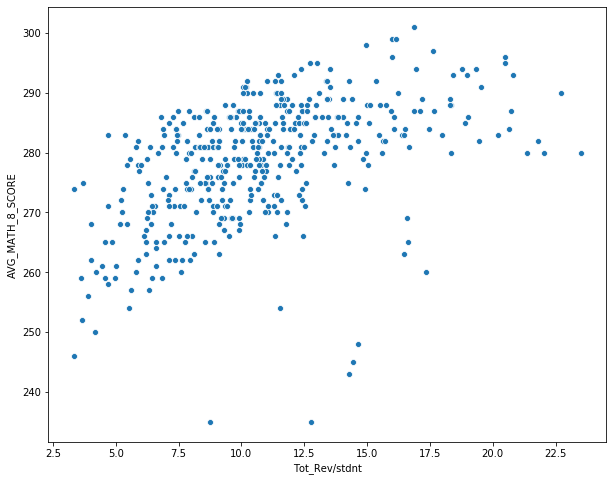

In [18]:
# Checking how Total revenue per student behaves with the target Math score
plt.figure(figsize = (10,8))
sns.scatterplot(x = df['Tot_Rev/stdnt'], y = df.AVG_MATH_8_SCORE)
plt.show()

**We can see a clear linear trend of the Avg Score with Total Revenus per student and it is incremental**

Visualization 2

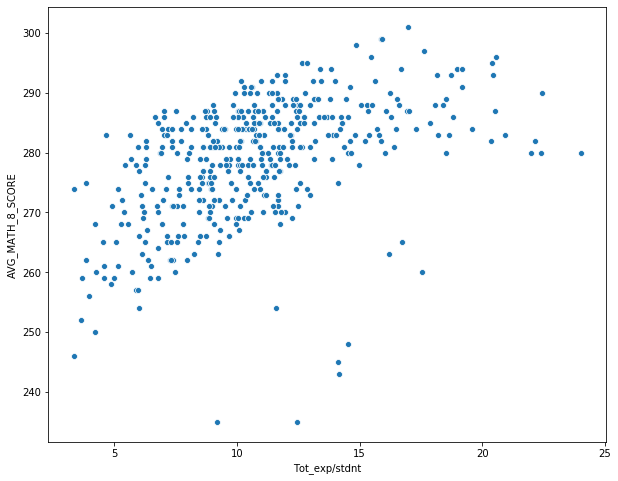

In [19]:
# Checking how Total expenditure per student behaves with the target Math score
plt.figure(figsize = (10,8))
sns.scatterplot(x = df['Tot_exp/stdnt'], y = df.AVG_MATH_8_SCORE)
plt.show()

**Similarly, WE can see the incremental trend between the score and total expendeture**

Visualization 3

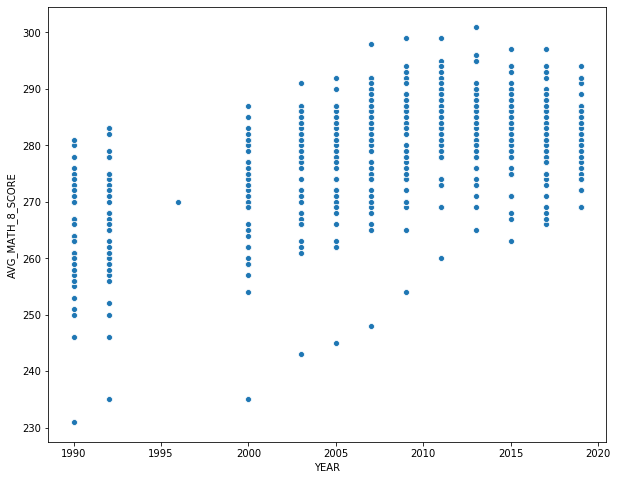

In [20]:
# Checking how year behaves with the target Math score
plt.figure(figsize = (10,8))
sns.scatterplot(x = df['YEAR'], y = df.AVG_MATH_8_SCORE)
plt.show()

**We can see a linear trend with year and average scores**

Visualization 4

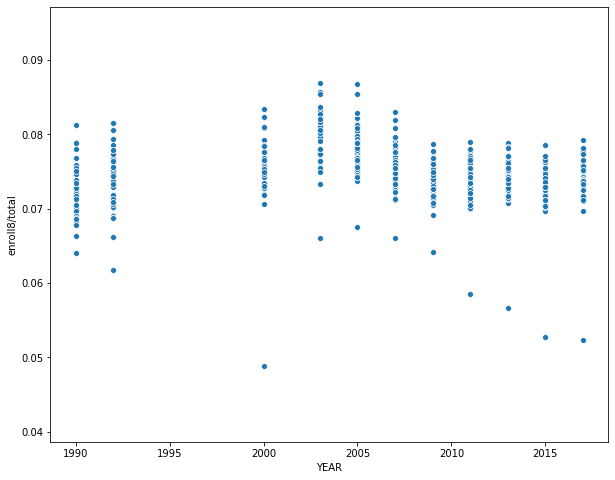

In [21]:
# Checking how the year behaves with enrollemnt/student
plt.figure(figsize = (10,8))
sns.scatterplot(y= df['enroll8/total'], x = df.YEAR)
plt.show()

**There is a trend with the enrollemnt factor and the year, hence we can say both year and the enrollment factor combined can give us a better predection of Average score**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [40]:
# Creating the Dataset with features generated
X = df[['Tot_Rev/stdnt','Tot_exp/stdnt', 'enroll8/total', 'fedrev/tot', 'strev/tot',
       'locrev/tot', 'instexp/tot', 'supserexp/tot', 'othexp/tot',
       'capexp/tot','YEAR']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [55]:
# Performing forward selection to look at the dominant featurs effecting the average marks
forward = forwardSelection(X,y,elimination_criteria='aic')

Character Variables (Dummies Generated, First Dummies Dropped): []
break : Criteria
                            OLS Regression Results                            
Dep. Variable:       AVG_MATH_8_SCORE   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Thu, 08 Oct 2020   Prob (F-statistic):                nan
Time:                        17:48:24   Log-Likelihood:                -1637.0
No. Observations:                 439   AIC:                             3276.
Df Residuals:                     438   BIC:                             3280.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

/home/adheeth_linux/yes/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


In [56]:
# Performing Backward selestion to look at the dominant features
back = backwardSelection(X,y,elimination_criteria='aic')

Character Variables (Dummies Generated, First Dummies Dropped): []
                            OLS Regression Results                            
Dep. Variable:       AVG_MATH_8_SCORE   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     62.23
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           1.62e-61
Time:                        17:48:44   Log-Likelihood:                -1483.7
No. Observations:                 439   AIC:                             2983.
Df Residuals:                     431   BIC:                             3016.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [39]:
def forwardSelection(X, y, model_type ="linear",elimination_criteria = "aic", varchar_process = "dummy_dropfirst", sl=0.05):
    """
    Forward Selection is a function, based on regression models, that returns significant features and selection iterations.\n
    Required Libraries: pandas, numpy, statmodels
    
    Parameters
    ----------
    X : Independent variables (Pandas Dataframe)\n
    y : Dependent variable (Pandas Series, Pandas Dataframe)\n
    model_type : 'linear' or 'logistic'\n
    elimination_criteria : 'aic', 'bic', 'r2', 'adjr2' or None\n
        'aic' refers Akaike information criterion\n
        'bic' refers Bayesian information criterion\n
        'r2' refers R-squared (Only works on linear model type)\n
        'r2' refers Adjusted R-squared (Only works on linear model type)\n
    varchar_process : 'drop', 'dummy' or 'dummy_dropfirst'\n
        'drop' drops varchar features\n
        'dummy' creates dummies for all levels of all varchars\n
        'dummy_dropfirst' creates dummies for all levels of all varchars, and drops first levels\n
    sl : Significance Level (default: 0.05)\n
    

    Returns
    -------
    columns(list), iteration_logs(str)\n\n
    Not Returns a Model
    

    Tested On
    ---------
    Python v3.6.7, Pandas v0.23.4, Numpy v1.15.04, StatModels v0.9.0
    

    See Also
    --------
    https://en.wikipedia.org/wiki/Stepwise_regression
    """
    X = __varcharProcessing__(X,varchar_process = varchar_process)
    return __forwardSelectionRaw__(X, y, model_type = model_type,elimination_criteria = elimination_criteria , sl=sl)
    
def backwardSelection(X, y, model_type ="linear",elimination_criteria = "aic", varchar_process = "dummy_dropfirst", sl=0.05):
    """
    Backward Selection is a function, based on regression models, that returns significant features and selection iterations.\n
    Required Libraries: pandas, numpy, statmodels
    
    Parameters
    ----------
    X : Independent variables (Pandas Dataframe)\n
    y : Dependent variable (Pandas Series, Pandas Dataframe)\n
    model_type : 'linear' or 'logistic'\n
    elimination_criteria : 'aic', 'bic', 'r2', 'adjr2' or None\n
        'aic' refers Akaike information criterion\n
        'bic' refers Bayesian information criterion\n
        'r2' refers R-squared (Only works on linear model type)\n
        'r2' refers Adjusted R-squared (Only works on linear model type)\n
    varchar_process : 'drop', 'dummy' or 'dummy_dropfirst'\n
        'drop' drops varchar features\n
        'dummy' creates dummies for all levels of all varchars\n
        'dummy_dropfirst' creates dummies for all levels of all varchars, and drops first levels\n
    sl : Significance Level (default: 0.05)\n
    

    Returns
    -------
    columns(list), iteration_logs(str)\n\n
    Not Returns a Model
    

    Tested On
    ---------
    Python v3.6.7, Pandas v0.23.4, Numpy v1.15.04, StatModels v0.9.0
    

    See Also
    --------
    https://en.wikipedia.org/wiki/Stepwise_regression    
    """
    X = __varcharProcessing__(X,varchar_process = varchar_process)
    return __backwardSelectionRaw__(X, y, model_type = model_type,elimination_criteria = elimination_criteria , sl=sl)

def __varcharProcessing__(X, varchar_process = "dummy_dropfirst"):
    
    dtypes = X.dtypes
    if varchar_process == "drop":   
        X = X.drop(columns = dtypes[dtypes == np.object].index.tolist())
        print("Character Variables (Dropped):", dtypes[dtypes == np.object].index.tolist())
    elif varchar_process == "dummy":
        X = pd.get_dummies(X,drop_first=False)
        print("Character Variables (Dummies Generated):", dtypes[dtypes == np.object].index.tolist())
    elif varchar_process == "dummy_dropfirst":
        X = pd.get_dummies(X,drop_first=True)
        print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == np.object].index.tolist())
    else: 
        X = pd.get_dummies(X,drop_first=True)
        print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == np.object].index.tolist())
    
    X["intercept"] = 1
    cols = X.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    X = X[cols]
    
    return X

def __forwardSelectionRaw__(X, y, model_type ="linear",elimination_criteria = "aic", sl=0.05):

    iterations_log = ""
    cols = X.columns.tolist()
    
    def regressor(y,X, model_type=model_type):
        if model_type == "linear":
            regressor = sm.OLS(y, X).fit()
        elif model_type == "logistic":
            regressor = sm.Logit(y, X).fit()
        else:
            print("\nWrong Model Type : "+ model_type +"\nLinear model type is seleted.")
            model_type = "linear"
            regressor = sm.OLS(y, X).fit()
        return regressor
    
    selected_cols = ["intercept"]
    other_cols = cols.copy()
    other_cols.remove("intercept")
    
    model = regressor(y, X[selected_cols])
    
    if elimination_criteria == "aic":
        criteria = model.aic
    elif elimination_criteria == "bic":
        criteria = model.bic
    elif elimination_criteria == "r2" and model_type =="linear":
        criteria = model.rsquared
    elif elimination_criteria == "adjr2" and model_type =="linear":
        criteria = model.rsquared_adj
    
    
    for i in range(X.shape[1]):
        pvals = pd.DataFrame(columns = ["Cols","Pval"])
        for j in other_cols:
            model = regressor(y, X[selected_cols+[j]])
            pvals = pvals.append(pd.DataFrame([[j, model.pvalues[j]]],columns = ["Cols","Pval"]),ignore_index=True)
        pvals = pvals.sort_values(by = ["Pval"]).reset_index(drop=True)
        pvals = pvals[pvals.Pval<=sl]
        if pvals.shape[0] > 0:
            
            model = regressor(y, X[selected_cols+[pvals["Cols"][0]]])
            iterations_log += str("\nEntered : "+pvals["Cols"][0] + "\n")    
            iterations_log += "\n\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n\n"
                    
        
            if  elimination_criteria == "aic":
                new_criteria = model.aic
                if new_criteria < criteria:
                    print("Entered :", pvals["Cols"][0], "\tAIC :", model.aic)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("break : Criteria")
                    break
            elif  elimination_criteria == "bic":
                new_criteria = model.bic
                if new_criteria < criteria:
                    print("Entered :", pvals["Cols"][0], "\tBIC :", model.bic)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("break : Criteria")
                    break        
            elif  elimination_criteria == "r2" and model_type =="linear":
                new_criteria = model.rsquared
                if new_criteria > criteria:
                    print("Entered :", pvals["Cols"][0], "\tR2 :", model.rsquared)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("break : Criteria")
                    break           
            elif  elimination_criteria == "adjr2" and model_type =="linear":
                new_criteria = model.rsquared_adj
                if new_criteria > criteria:
                    print("Entered :", pvals["Cols"][0], "\tAdjR2 :", model.rsquared_adj)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("Break : Criteria")
                    break
            else:
                print("Entered :", pvals["Cols"][0])
                selected_cols.append(pvals["Cols"][0])
                other_cols.remove(pvals["Cols"][0])            
                
        else:
            print("Break : Significance Level")
            break
        
    model = regressor(y, X[selected_cols])
    if elimination_criteria == "aic":
        criteria = model.aic
    elif elimination_criteria == "bic":
        criteria = model.bic
    elif elimination_criteria == "r2" and model_type =="linear":
        criteria = model.rsquared
    elif elimination_criteria == "adjr2" and model_type =="linear":
        criteria = model.rsquared_adj
    
    print(model.summary())
    print("AIC: "+str(model.aic))
    print("BIC: "+str(model.bic))
    print("Final Variables:", selected_cols)

    return selected_cols, iterations_log

def __backwardSelectionRaw__(X, y, model_type ="linear",elimination_criteria = "aic", sl=0.05):
    
    iterations_log = ""
    last_eleminated = ""    
    cols = X.columns.tolist()

    def regressor(y,X, model_type=model_type):
        if model_type =="linear":
            regressor = sm.OLS(y, X).fit()
        elif model_type == "logistic":
            regressor = sm.Logit(y, X).fit()
        else:
            print("\nWrong Model Type : "+ model_type +"\nLinear model type is seleted.")
            model_type = "linear"
            regressor = sm.OLS(y, X).fit()
        return regressor
    for i in range(X.shape[1]):
        if i != 0 :          
            if elimination_criteria == "aic":
                criteria = model.aic
                new_model = regressor(y,X)
                new_criteria = new_model.aic
                if criteria < new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "bic":
                criteria = model.bic
                new_model = regressor(y,X)
                new_criteria = new_model.bic
                if criteria < new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "adjr2" and model_type =="linear":
                criteria = model.rsquared_adj
                new_model = regressor(y,X)
                new_criteria = new_model.rsquared_adj
                if criteria > new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "r2" and model_type =="linear":
                criteria = model.rsquared
                new_model = regressor(y,X)
                new_criteria = new_model.rsquared
                if criteria > new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break   
            else: 
                new_model = regressor(y,X)
            model = new_model
            iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
        else:
            model = regressor(y,X)
            iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
        maxPval = max(model.pvalues)
        cols = X.columns.tolist()
        if maxPval > sl:
            for j in cols:
                if (model.pvalues[j] == maxPval):
                    print("Eliminated :" ,j)
                    iterations_log += str("\n\nEliminated : "+j+ "\n\n")
                    
                    del X[j]
                    last_eleminated = j
        else:
            break
    print(str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic))
    print("Final Variables:", cols)
    iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
    return cols, iterations_log

In [64]:
# From the above generated Summary of Ordinary least squares, we can see that 
# Total revenue per student is very insignificant as it has high p value == 0.5
# Similarly, federal , state and local revenues have the same effect with high p value
# In the below, we select the features which have p value less than 0.5
# and ceate our model.
#X = df[['Tot_exp/stdnt', 'enroll8/total', 'supserexp/tot','capexp/tot', 'instexp/tot', 'othexp/tot','YEAR']].dropna()
X = df[['Tot_exp/stdnt', 'enroll8/total', 'fedrev/tot', 'instexp/tot', 'supserexp/tot', 'capexp/tot', 'YEAR']].dropna()
#X = df[['TOTAL_EXPENDITURE', 'ENROLL_8', 'SUPPORT_SERVICES_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE','YEAR']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       AVG_MATH_8_SCORE   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     62.23
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           1.62e-61
Time:                        17:52:29   Log-Likelihood:                -1483.7
No. Observations:                 439   AIC:                             2983.
Df Residuals:                     431   BIC:                             3016.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1295.7205    148.718     -8.713

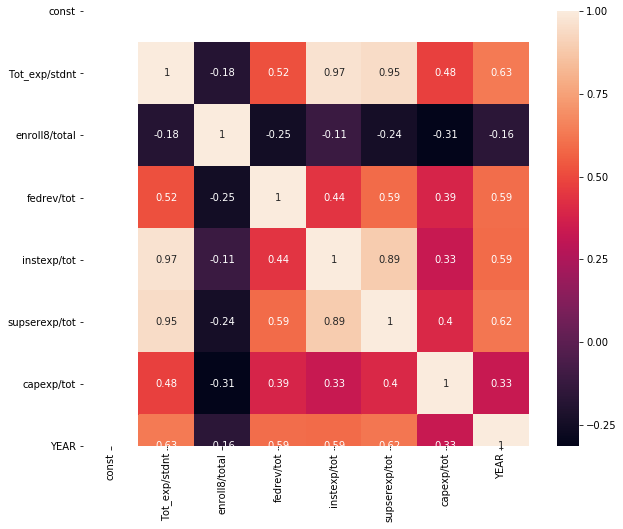

In [62]:
# Looking at the corelation of the predictiors to see if we can reduce the model complexity, but if we try to remove the intexp and supexp 
# we shall tradeoff on error.
plt.figure(figsize=(10,8))
cov = X.corr()
sns.heatmap(cov,annot=True)

<h2> Prediction </h2>

In [65]:
# Splitting the final set of features into Test & Train
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=0)

Chosen ML task: **REGRESSION**

In [66]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [67]:
# create your model here
model = LinearRegression()

In [68]:
# Fitting the mode onto our training data
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
# predicting 
y_pred = model.predict(X_test)

In [70]:
# Looking at the model intercepts & coeffecients
print(model.intercept_)
print(model.coef_)

-1103.8837460247512
[  0.           4.17509061 504.57491863  -5.78217859  -2.37176579
  -5.72488652  -3.27562395   0.6680165 ]


In [71]:
# R**2 value describes how well a linear model fits the data
model.score(X_test, y_test)

0.5441649315965988

In [72]:
# mean error
np.mean(model.predict(X_test)-y_test)

0.36360088317597916

Text(0, 0.5, 'MAth 8 Scores')

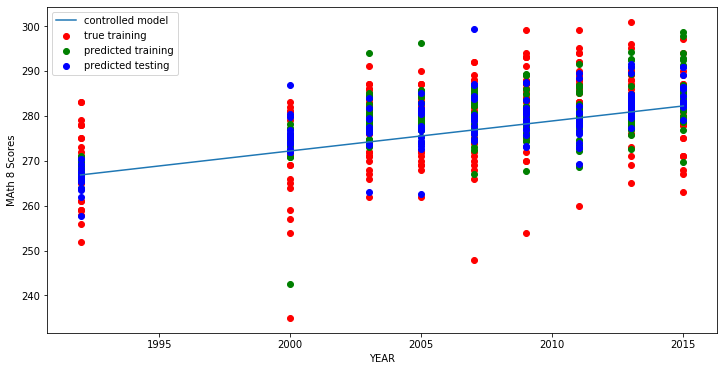

In [77]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.

 
col_name = 'YEAR'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('MAth 8 Scores')

<h2> Summary </h2>

**It is clear form the initial analysis of OLS that the performance of students in MAth is not dependent on the Revenue generated in any level. It depends upon the expendeture, the year and total enrollments. Interestingly the expenditure has a negative effect on the performance where as the total expendeture has a positive effect. The Model is highly dependent on the enrollments as its coeffecient value is very high compared to other features as well year also plays an important part for predicting the performance. Overall, though this model is only able to define the 51% of the variability associated with the performance, the remining 49% percent is still unknown. This might be either due to a large number of missing values which brings down the training & testing data to 600 rows.**